In [254]:
'''
Kaggle Competition
Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during 
her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers 
and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats 
for the passengers and crew.

Although there was some element of luck involved in surviving the sinking, some groups of people were more 
likely to survive than others, such as women, children, and the upper-class.

In this challenge, Kaggle ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, Kaggle ask you to apply the tools of machine learning to predict which passengers survived 
the tragedy.

'''

'\nKaggle Competition\nTitanic: Machine Learning from Disaster\n\nThe sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during \nher maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers \nand crew. Translated 32% survival rate.\n\nOne of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats \nfor the passengers and crew.\n\nAlthough there was some element of luck involved in surviving the sinking, some groups of people were more \nlikely to survive than others, such as women, children, and the upper-class.\n\nIn this challenge, Kaggle ask you to complete the analysis of what sorts of people were likely to survive. \nIn particular, Kaggle ask you to apply the tools of machine learning to predict which passengers survived \nthe tragedy.\n\n'

In [1]:
import csv as csv
import numpy as np
csv_file_object = csv.reader(open('../csv/train.csv', 'rb'))
header = csv_file_object.next()
data = []
for row in csv_file_object:
    data.append(row)
data = np.array(data)
print data


[['1' '0' '3' ..., '7.25' '' 'S']
 ['2' '1' '1' ..., '71.2833' 'C85' 'C']
 ['3' '1' '3' ..., '7.925' '' 'S']
 ..., 
 ['889' '0' '3' ..., '23.45' '' 'S']
 ['890' '1' '1' ..., '30' 'C148' 'C']
 ['891' '0' '3' ..., '7.75' '' 'Q']]


In [2]:
##### -------------Intro -------------
# use pandas to engineering changes to data, then use sklearn.ensemble.RandomForestClassifier to predict outcome.

In [3]:
### ----- Read csv files in panda -----

In [4]:
import re
import pandas as pd
import pylab as P

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from sklearn.ensemble import RandomForestClassifier



In [5]:
titanic = pd.read_csv('../csv/train.csv', header=0)
#print df.head(3)

titanic_test = pd.read_csv('../csv/test.csv', header=0)
#print tdf.head(3)

In [6]:
type(titanic)

pandas.core.frame.DataFrame

In [7]:
### ------ Study dataframe features and correlations ------

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
titanic.describe().transpose()

/Users/LiWang/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42       NaN       NaN    NaN   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [11]:
titanic_test.describe().transpose()

count         mean         std     min     25%     50%      75%  \
PassengerId  418.0  1100.500000  120.810458  892.00  996.25  1100.5  1204.75   
Pclass       418.0     2.265550    0.841838    1.00    1.00     3.0     3.00   
Age          332.0    30.272590   14.181209    0.17     NaN     NaN      NaN   
SibSp        418.0     0.447368    0.896760    0.00    0.00     0.0     1.00   
Parch        418.0     0.392344    0.981429    0.00    0.00     0.0     0.00   
Fare         417.0    35.627188   55.907576    0.00     NaN     NaN      NaN   

                   max  
PassengerId  1309.0000  
Pclass          3.0000  
Age            76.0000  
SibSp           8.0000  
Parch           9.0000  
Fare          512.3292

In [12]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

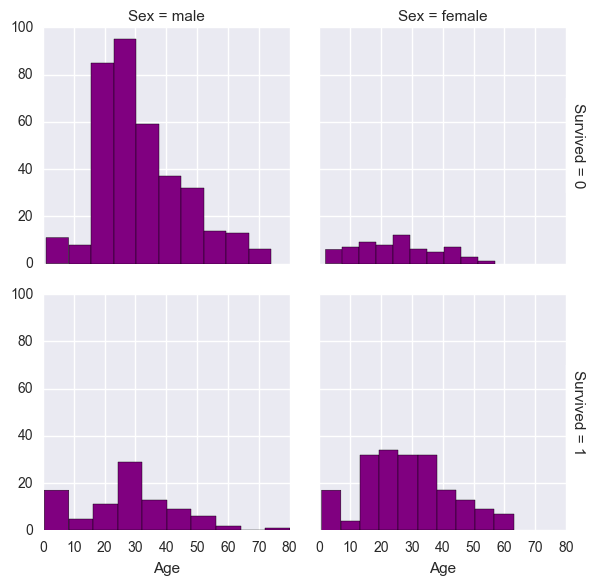

In [14]:
# Survival by Gender and Age
g = sns.FacetGrid(titanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple")


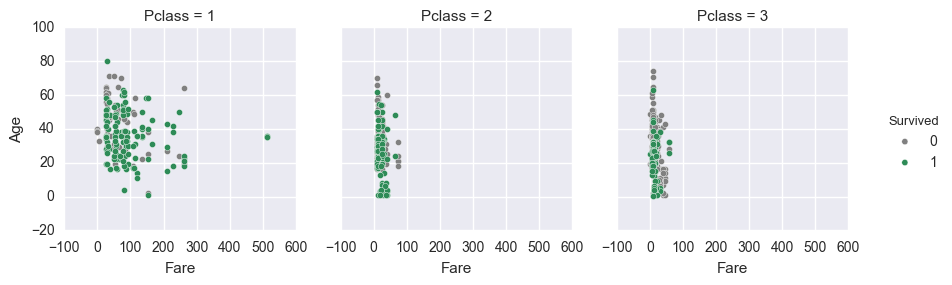

In [15]:
# Survival by Fare and Age factored by Pclsss
g = sns.FacetGrid(titanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
# Less older people survived

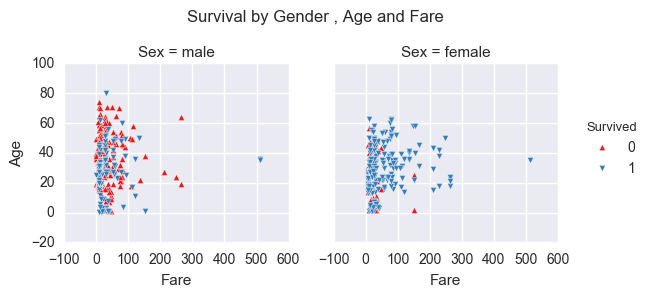

In [16]:
# Survival by Fare and Age factored by Sex 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

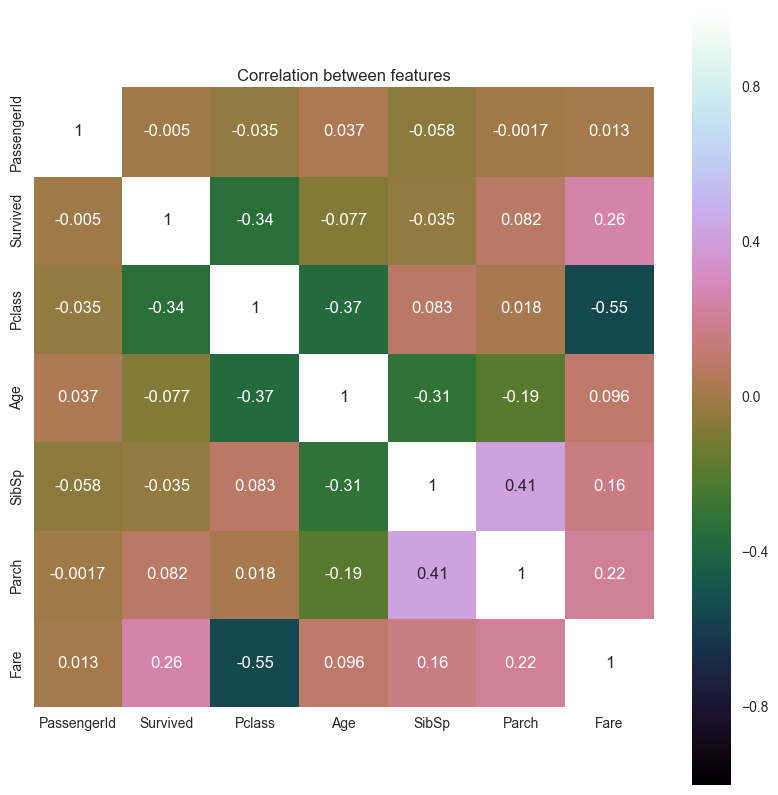

In [17]:
# Correlation study of features

corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

In [18]:
#correlation of features with target variable
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

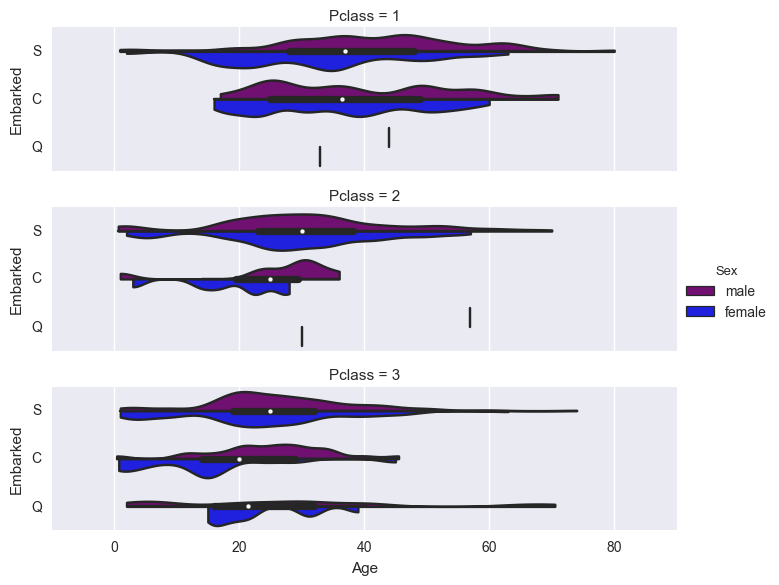

In [19]:
# sex distribution by Pclass and Embarked
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=titanic[titanic.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2)

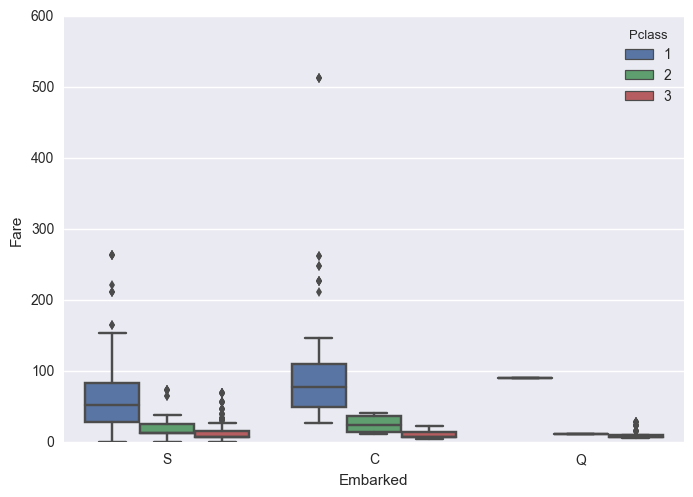

In [20]:
# Fare by Pclass and Embarked
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic)

# Higher median fare for first class from Port 'C'

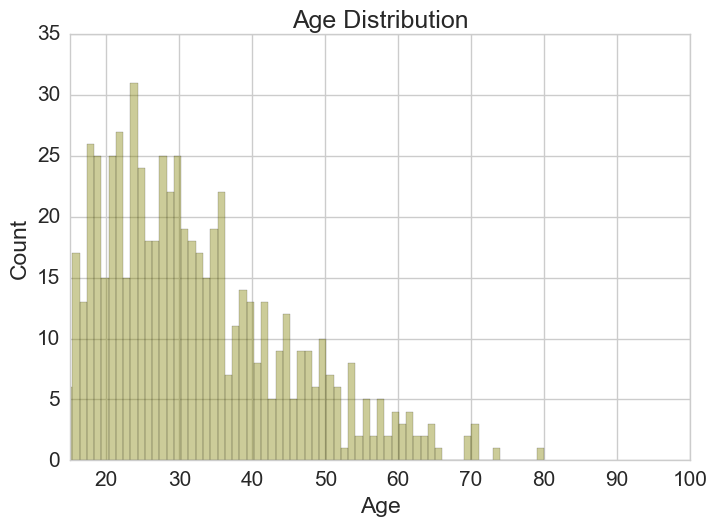

In [21]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(titanic["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="olive")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

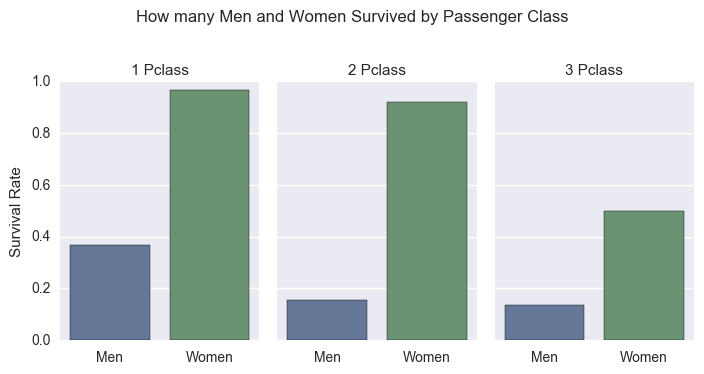

In [22]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=titanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class')
# Gender is a significiant factor for survival

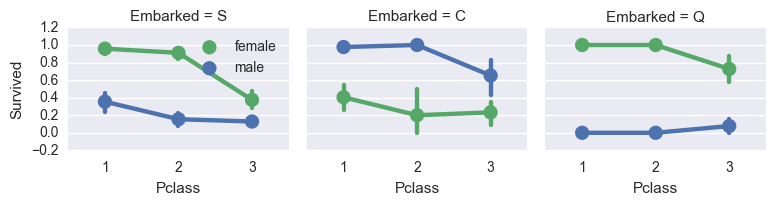

In [256]:
grid = sns.FacetGrid(titanic, col='Embarked', size=2.2, aspect=1.2, legend_out=False)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

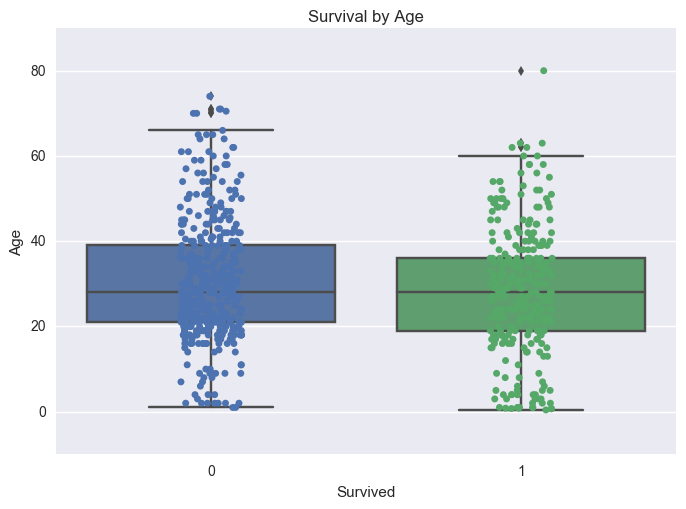

In [23]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=titanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=titanic, jitter=True,
                   edgecolor="gray")
sns.plt.title("Survival by Age",fontsize=12)

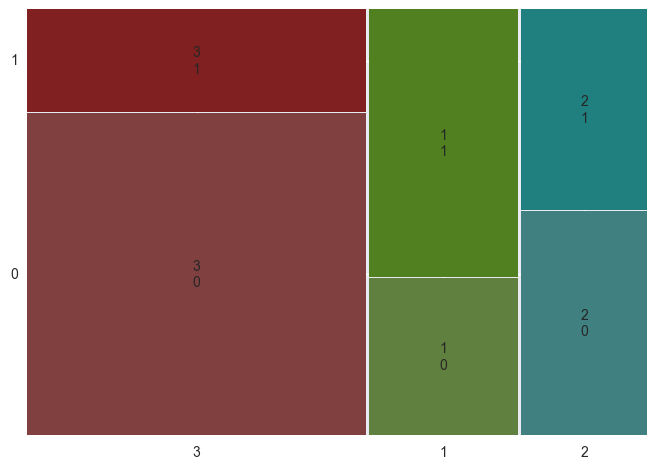

In [24]:
mosaic(titanic, ['Pclass', 'Survived'])
P.show()

In [25]:
# Creat new column 'Deck'

def create_deck_col(df):
    df['Deck'] = df['Cabin'].str[0]
    
    df['DeckZ'] = df['Deck']
    df.DeckZ.fillna('Z', inplace=True)
    df['DeckZ'] = df['DeckZ'].map( {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'T': 6, 'F': 7, 'G': 8, 'Z': 0} ).astype(int)
    
    return df

In [26]:
titanic = create_deck_col(titanic)
titanic_test = create_deck_col(titanic_test)

#titanic["Deck"].unique() # 0 is for null values
#original: array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)
titanic["DeckZ"].unique()

array([0, 3, 5, 8, 4, 1, 2, 7, 6])

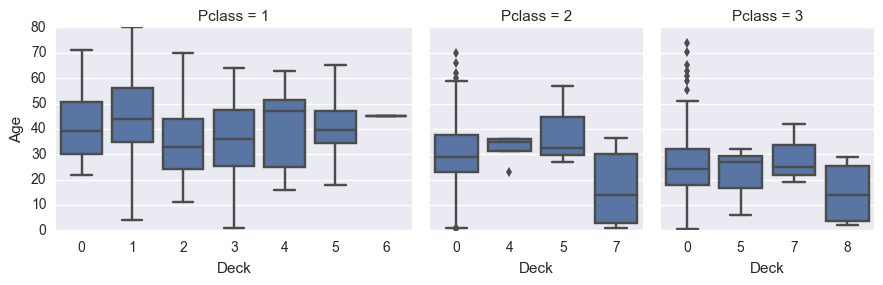

In [27]:
titanic_d = titanic.assign(Deck=titanic.DeckZ.astype(object)).sort_values(by="DeckZ")
g = sns.FacetGrid(titanic_d, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Deck", "Age");

In [28]:
#
# For Deck column, there are a lot of null value.  Once null values replaced with Z, 
# survival difference among Pclass are not significiant.

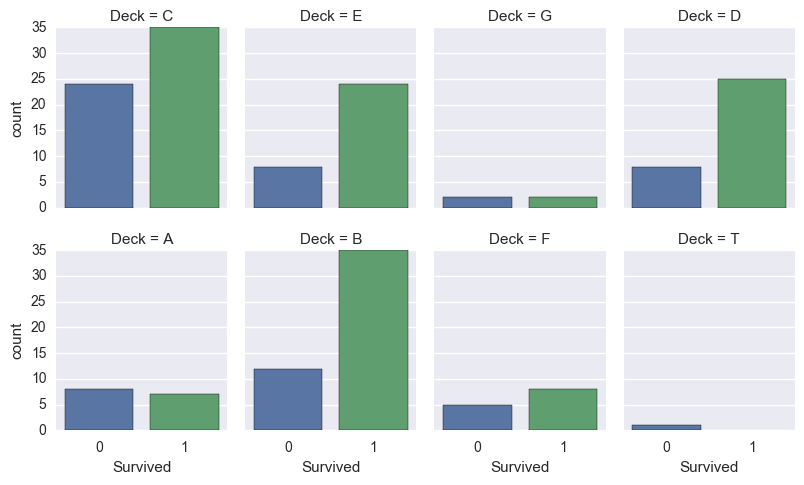

In [29]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=titanic[titanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8)

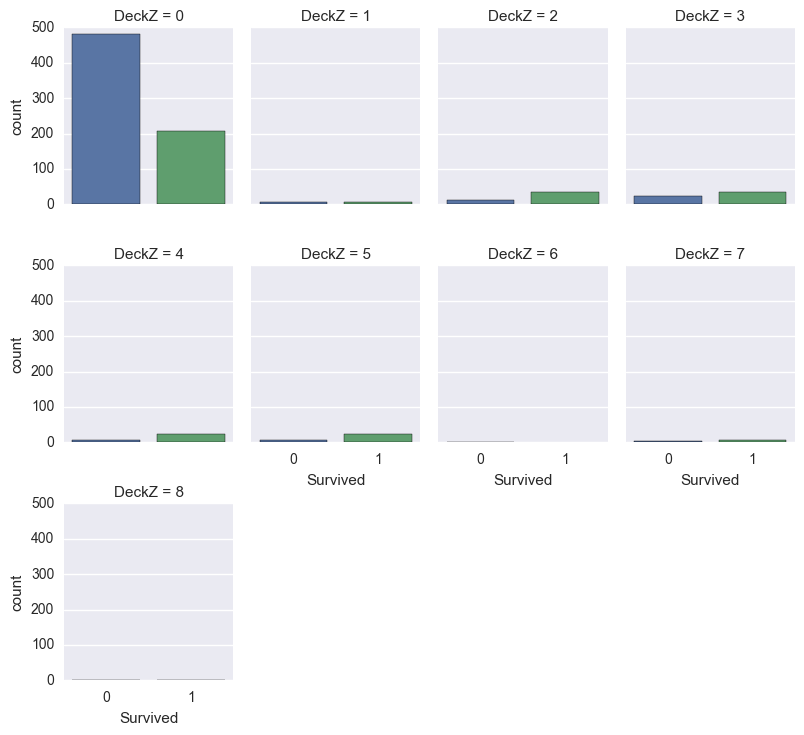

In [30]:
g = sns.factorplot("Survived", col="DeckZ", col_wrap=4,
                    data=titanic,
                    kind="count", size=2.5, aspect=.8)

In [31]:
# Create feature for length of name 

def create_name_length_col(df):
    # The .apply method generates a new series
    df["NameLength"] = df["Name"].apply(lambda x: len(x))

    #bins = [0, 20, 40, 57, 85]
    #group_names = ['short', 'okay', 'good', 'long']
    #df['NlengthD'] = pd.cut(df['NameLength'], bins, labels=group_names)
    df['NlengthD'] = df["Name"].apply(lambda x: round(len(x)/10))
    return df


In [32]:
titanic = create_name_length_col(titanic)
print(titanic["NlengthD"].value_counts())

2.0    428
1.0    204
3.0    162
4.0     68
5.0     25
6.0      3
8.0      1
Name: NlengthD, dtype: int64


[ 2.  5.  4.  1.  3.  8.  6.]


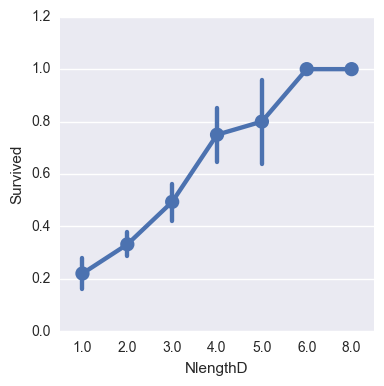

In [33]:
sns.factorplot(x="NlengthD", y="Survived", data=titanic)
print(titanic["NlengthD"].unique())

In [34]:
titanic_test = create_name_length_col(titanic_test)

In [35]:
#### ----- Create new column title -----

In [36]:
def create_title_col(df):
    df['Title'] = df['Name'].str.extract('([A-Z]\w{0,}\.)', expand=True)
    
    df.loc[df["Title"] == "Mlle.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Ms.", "Title"] = 'Miss.'
    df.loc[df["Title"] == "Mme.", "Title"] = 'Mrs.'
    df.loc[df["Title"] == "Dona.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Lady.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Countess.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Capt.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Col.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Don.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Major.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Rev.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Sir.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Jonkheer.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Dr.", "Title"] = 'Rare.'
    df.loc[df["Title"] == "Master.", "Title"] = 'Rare.'
    
    df.loc[ df['Title'] == 'Mr.', 'TitleNum' ] = 1
    df.loc[ df['Title'] == 'Miss.', 'TitleNum'] = 2
    df.loc[ df['Title'] == 'Mrs.', 'TitleNum' ] = 3
    df.loc[ df['Title'] == 'Rare.', 'TitleNum' ] = 4
    
    return df

In [37]:
titanic = create_title_col(titanic)
titanic['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Rare.'], dtype=object)

In [38]:
titanic['TitleNum'].unique()

array([ 1.,  3.,  2.,  4.])

In [39]:
titanic[titanic['Title'].isnull()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Deck, DeckZ, NameLength, NlengthD, Title, TitleNum]
Index: []

In [40]:
#df['Title'].unique()
#array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
#       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', nan, 'Col.', 'Capt.',
#       'Countess.', 'Jonkheer.'], dtype=object)

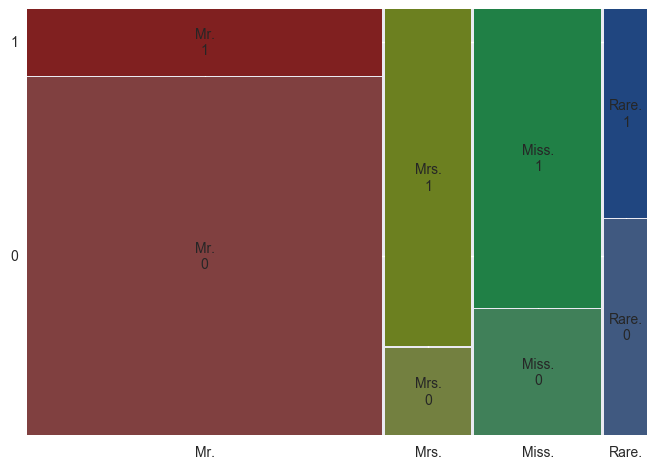

In [41]:
#from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams['font.size'] = 16.0
mosaic(titanic, ['Title', 'Survived'])
P.show()

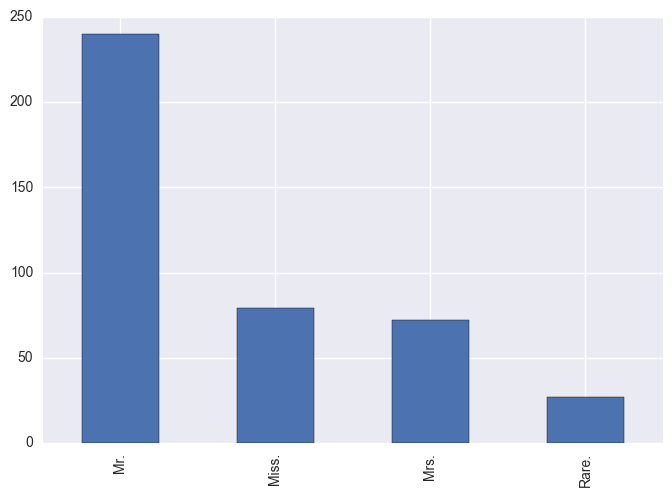

In [42]:
titanic_test = create_title_col(titanic_test)
titanic_test.Title.value_counts().plot(kind='bar')
P.show()

In [43]:
titanic_test['Title'].isnull().any()

False

In [44]:
#### Engineering new column Gender with int, female:0, male: 1, child(16): 2

In [45]:
for i in range(4):
    print i, len(titanic[ (titanic['Sex'] == 'male') & (titanic['Pclass'] == i) ])

0 0
1 122
2 108
3 347


In [46]:
def create_gender_col(df):
    #df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df.loc[ df['Age'] < 16, 'Gender' ] = 2
    return df

In [47]:
titanic = create_gender_col(titanic)
titanic.Gender.unique()

array([1, 0, 2])

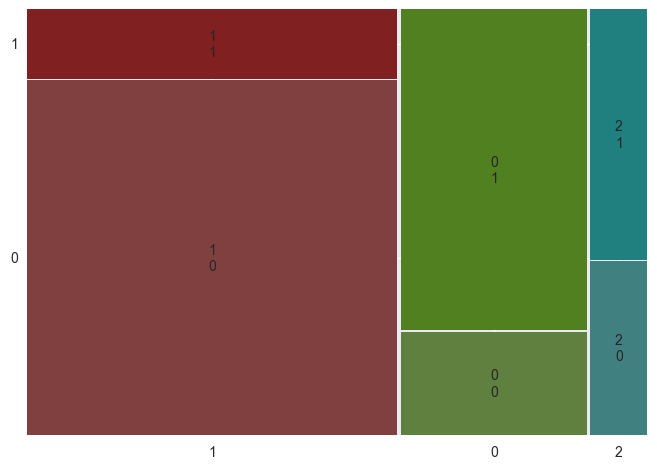

In [48]:
mosaic( titanic, ['Gender', 'Survived'] )
P.show()

In [49]:
titanic_test = create_gender_col(titanic_test)
titanic_test.Gender.unique()

array([1, 0, 2])

In [50]:
### ----- Fill in missing data - Embarked ----
### ------ Engineering new column - Port with int -----
# Embarked: Cherbourg (2), Southamption (1), and Queenstown (3)

In [51]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [52]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare']].head(10)

Sex  Pclass Embarked  Fare
61   female       1      NaN  80.0
829  female       1      NaN  80.0

In [53]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'S') ].Fare.median()

79.65

In [54]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'C') ].Fare.median()

83.1583

In [55]:
titanic[ (titanic['Pclass'] == 1) & (titanic['Sex'] == 'female') & (titanic['Embarked'] == 'Q') ].Fare.median()

90.0

In [56]:
titanic['Port'] = titanic['Embarked']

In [57]:
titanic.loc[ titanic['Embarked'].isnull(), 'Port'] = 'S'

In [58]:
titanic[ titanic['Embarked'].isnull() ][['Sex', 'Pclass', 'Embarked', 'Fare', 'Port']]

Sex  Pclass Embarked  Fare Port
61   female       1      NaN  80.0    S
829  female       1      NaN  80.0    S

In [59]:
def transform_port_num(df):
    df['Port'] = df['Port'].map( {'S': 1, 'C': 2, 'Q': 3} )
    return df   

In [60]:
titanic = transform_port_num(titanic)
titanic['Port'].unique()
#original: array(['S', 'C', 'Q'], dtype=object)

array([1, 2, 3])

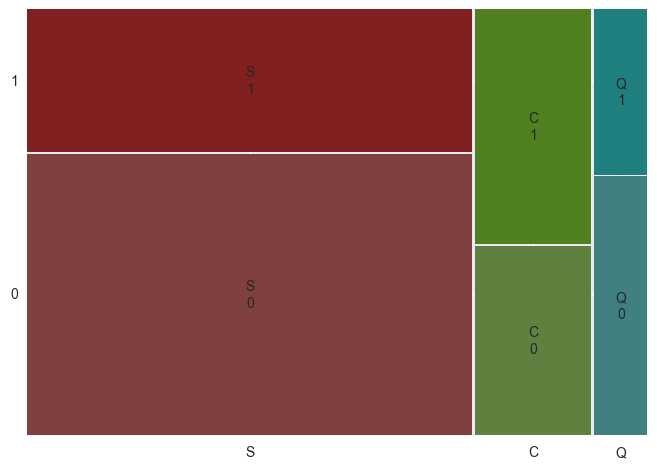

In [61]:
mosaic( titanic, ['Embarked', 'Survived'])
P.show()

In [62]:
titanic_test[ titanic_test['Embarked'].isnull() ][['Gender', 'Pclass', 'Embarked']]

Empty DataFrame
Columns: [Gender, Pclass, Embarked]
Index: []

In [63]:
titanic_test['Port'] = titanic_test['Embarked']
titanic_test = transform_port_num(titanic_test)
titanic_test['Port'].unique()

array([3, 1, 2])

In [64]:
#titanic_test['Port'].unique()
#array(['Q', 'S', 'C'], dtype=object)

In [65]:
### --- Engineering new FamilySize column ---

def create_familysize_col(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    df['FsizeD'] = 1
    df.loc[ (df['FamilySize'] > 1) & (df['FamilySize'] < 5), 'FsizeD'] = 2
    df.loc[ df['FamilySize'] >= 5, 'FsizeD'] = 3
    
    return df

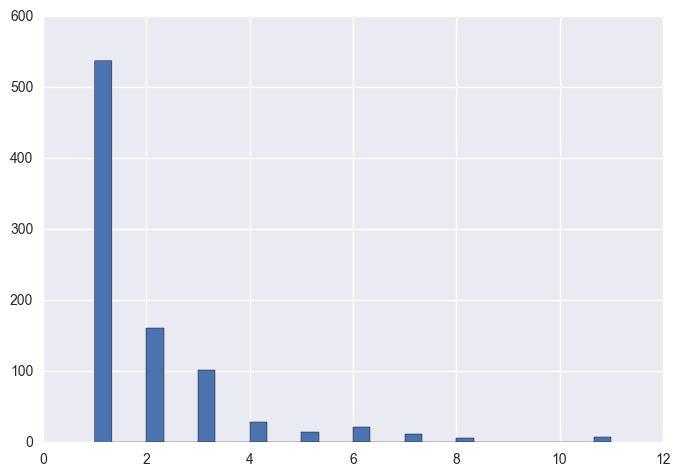

In [66]:
titanic = create_familysize_col(titanic)
titanic['FamilySize'].hist(bins=30)

In [67]:
titanic['FsizeD'].unique()

array([2, 1, 3])

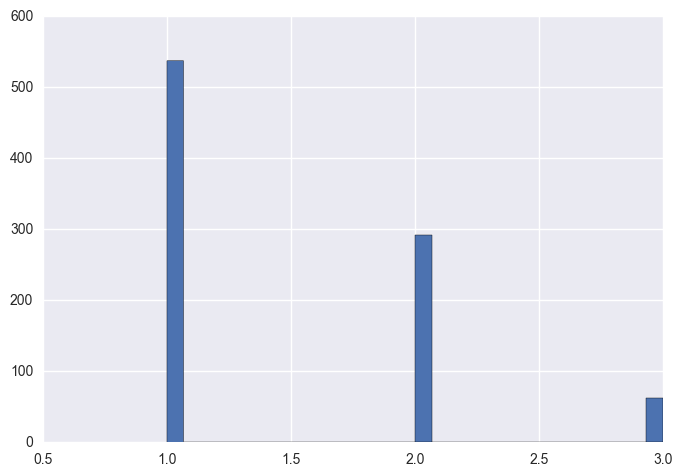

In [68]:
titanic['FsizeD'].hist(bins=30)

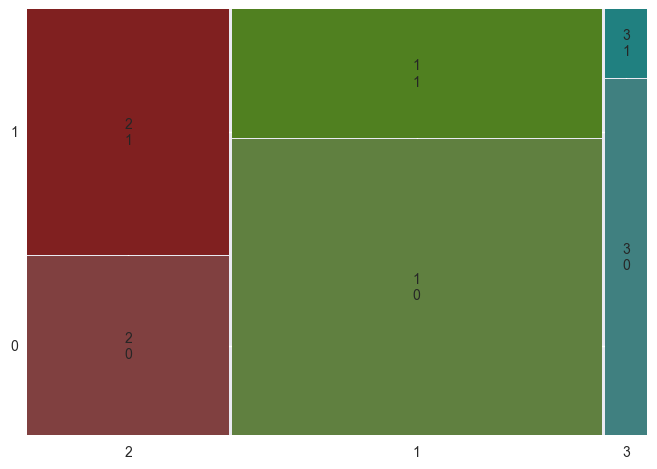

In [69]:
mosaic(titanic, ['FsizeD', 'Survived'])
P.show()

In [70]:
titanic_test = create_familysize_col(titanic_test)

In [71]:
### ---- Fill missing data in Fare (test data) ----

In [72]:
titanic[ titanic['Fare'].isnull() ]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Deck, DeckZ, NameLength, NlengthD, Title, TitleNum, Gender, Port, FamilySize, FsizeD]
Index: []

[0 rows x 22 columns]

In [73]:
titanic_test[ titanic_test['Fare'].isnull() ]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin   ...   Deck DeckZ  NameLength  NlengthD  Title TitleNum  \
152   NaN   NaN   ...    NaN     0          18       1.0    Mr.      1.0   

     Gender  Port  FamilySize  FsizeD  
152       1     1           1       1  

[1 rows x 21 columns]

In [74]:
titanic[ (titanic['Pclass'] == 3) & (titanic['Sex'] == 'male') & (titanic['Embarked'] == 'S') ].Fare.median()

8.05

In [75]:
titanic_test.loc[ titanic_test['PassengerId'] == 1044, 'Fare' ] = 8.05

In [76]:
titanic_test[ titanic_test['Fare'].isnull() ]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Deck, DeckZ, NameLength, NlengthD, Title, TitleNum, Gender, Port, FamilySize, FsizeD]
Index: []

[0 rows x 21 columns]

In [77]:
### --- Engineering new column Age*Class --- drop column

In [258]:
#
def create_ageclass_col(df):
    df['Age*Class'] = df.AgeInterp * df.Pclass
    
    #bins = [0, 20, 40, 57, 85]
    #group_names = ['a', 'b', 'c', 'd']
    #df['Age*ClassD'] = pd.cut(df['Age*Class'], bins, labels=group_names)
    
    return df

In [259]:
titanic = create_ageclass_col(titanic)


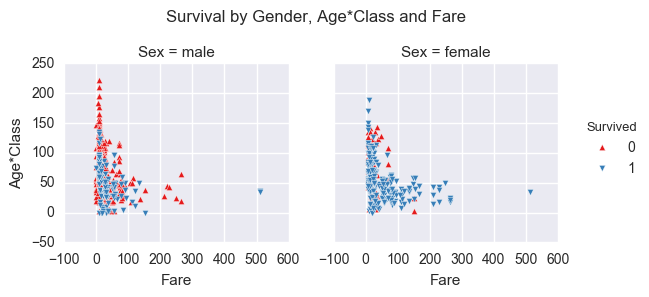

In [261]:
# Survival by Age*Class and Age factored by Gender 
g = sns.FacetGrid(titanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age*Class",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender, Age*Class and Fare')

In [80]:
#titanic['Age*Class'].value_count()
#titanic['Age*Class'].hist(bins=16)
#P.show()

#mosaic(titanic, ['Age*Class', 'Survived'])
#P.show()

In [262]:
titanic_test = create_ageclass_col(titanic_test)

In [82]:
### ---- Engineering missing data in Age (median) ----

In [83]:
median_ages = np.zeros((2,3))
for i in range(0,2):
    for j in range(0, 3):
        median_ages[i,j] = titanic[(titanic['Gender'] == i) & (titanic['Pclass'] == j+1)]['Age'].dropna().median()
print median_ages

[[ 35.  30.  26.]
 [ 42.  31.  27.]]


In [84]:
def fill_missing_age_median(df):
    df['AgeMean'] = df['Age']
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1), 'AgeMean'] = median_ages[i,j]      
    return df

In [85]:
titanic = fill_missing_age_median(titanic)
titanic[ titanic['Age'].isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)

Gender  Pclass  Age  AgeMean
5        1       3  NaN     27.0
17       1       2  NaN     31.0
19       0       3  NaN     26.0
26       1       3  NaN     27.0
28       0       3  NaN     26.0
29       1       3  NaN     27.0
31       0       1  NaN     35.0
32       0       3  NaN     26.0
36       1       3  NaN     27.0
42       1       3  NaN     27.0

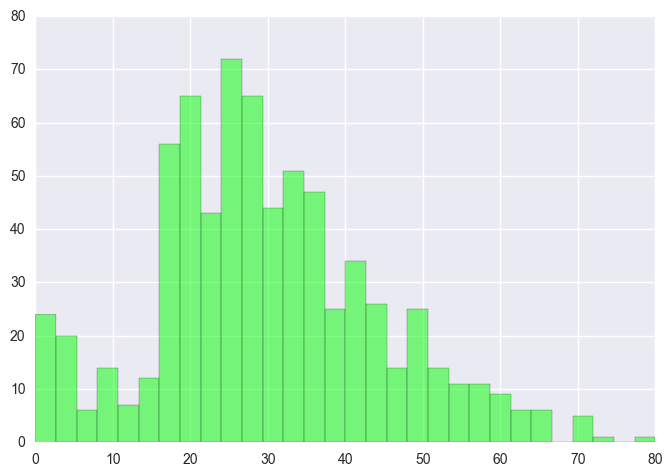

In [86]:
titanic['Age'].dropna().hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

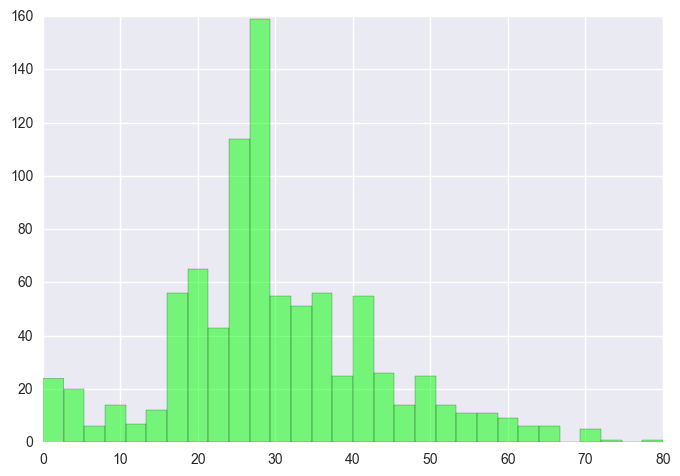

In [87]:
titanic['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='lime')
P.show()

In [88]:
titanic_test = fill_missing_age_median(titanic_test)
        
titanic_test[ titanic_test.Age.isnull() ][['Gender', 'Pclass', 'Age', 'AgeMean']].head(10)


Gender  Pclass  Age  AgeMean
10       1       3  NaN     27.0
22       0       1  NaN     35.0
29       1       3  NaN     27.0
33       0       3  NaN     26.0
36       0       3  NaN     26.0
39       1       3  NaN     27.0
41       1       1  NaN     42.0
47       1       3  NaN     27.0
54       1       2  NaN     31.0
58       1       3  NaN     27.0

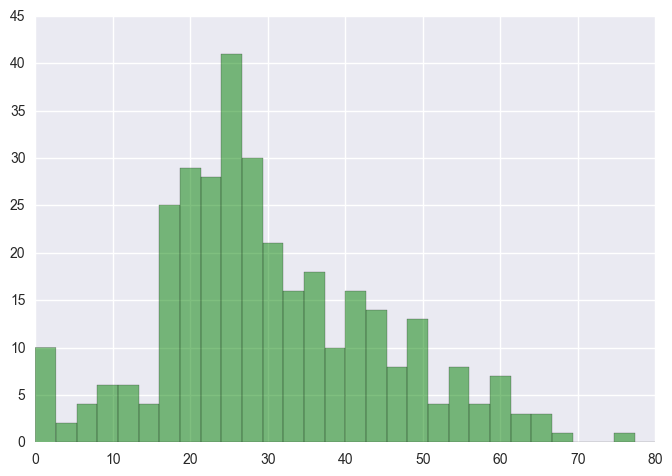

In [89]:
titanic_test['Age'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

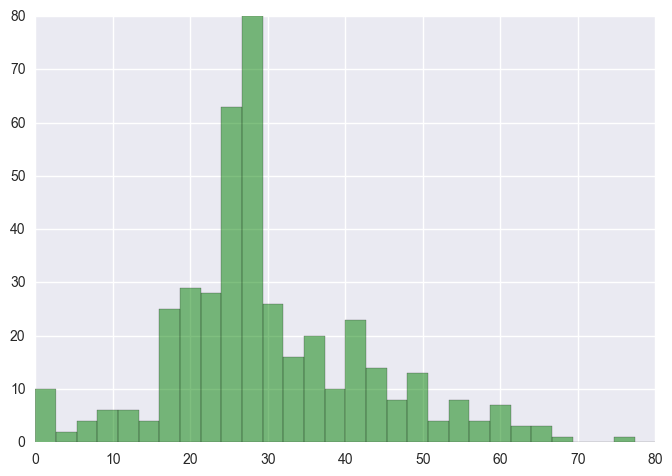

In [90]:
titanic_test['AgeMean'].hist( bins=30, range=(0,80), alpha=.5, color='green')
P.show()

In [91]:
# Re-engineering missing age with random number between mean and std

In [92]:
#df[ df['Age'].isnull() ].groupby(['Port', 'Gender', 'Pclass'])[['Gender', 'Age']].count()

In [93]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).mean()

In [94]:
#df[['Age', 'Port', 'Gender', 'Pclass']].dropna().groupby(['Port', 'Gender', 'Pclass']).agg([np.size, np.mean, np.std])

In [95]:
# generate random numbers between (mean - std) & (mean + std)

def generate_random(avg, std, sz):
    rand_1 = np.random.randint(avg - std, avg + std, size = sz)
    rand_2 = np.random.randint(avg - std , avg + std, size = sz)

In [96]:
## ---- Reengineer missing age with dataframe interpolate (AgeInterp) -----

In [97]:
def creat_missing_age_interpolate(df):
    df['AgeInterp'] = df['Age']
    df['AgeInterp'] = df[ ['AgeInterp']].interpolate().astype(int)
    return df

In [98]:
titanic = creat_missing_age_interpolate(titanic)
titanic[ titanic['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

Empty DataFrame
Columns: [Age, AgeInterp]
Index: []

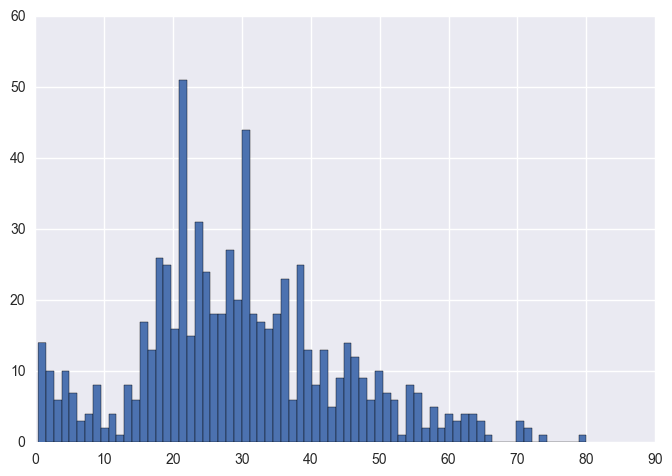

In [99]:
titanic['Age'].dropna().hist(bins=70)
P.show()

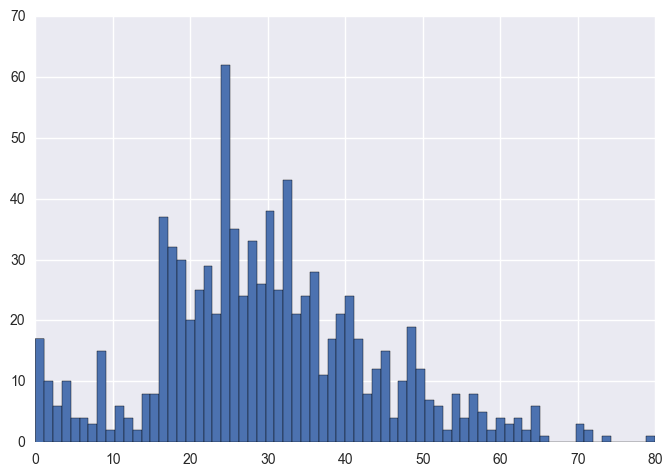

In [100]:
titanic['AgeInterp'].hist(bins=70)
P.show()

In [101]:
titanic_test = creat_missing_age_interpolate(titanic_test)
titanic_test[ titanic_test['AgeInterp'].isnull() ][['Age', 'AgeInterp']]

Empty DataFrame
Columns: [Age, AgeInterp]
Index: []

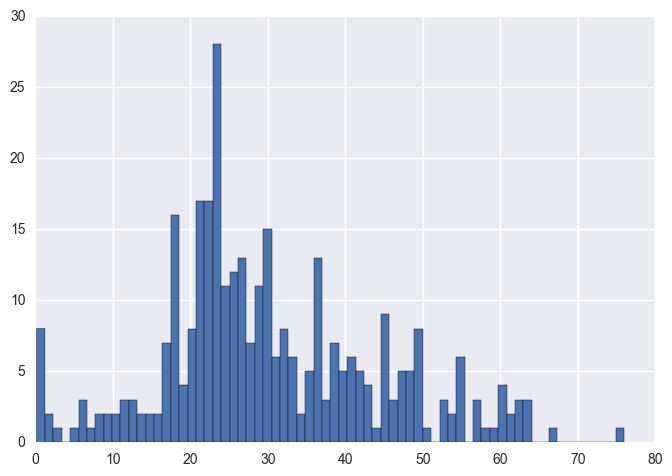

In [102]:
titanic_test.Age.dropna().hist(bins=70)
P.show()

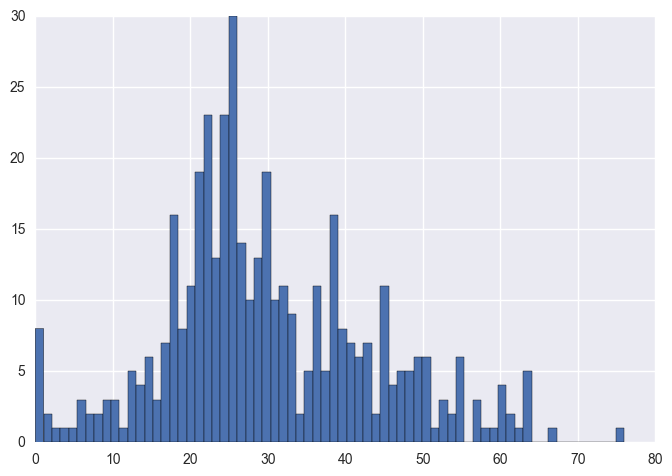

In [103]:
titanic_test.AgeInterp.hist(bins=70)
P.show()

In [104]:
#predicting missing values in age using Random Forest

from sklearn.ensemble import RandomForestRegressor

def fill_missing_age_rf(df):
    
    #Feature set
    df['AgeRF'] = df['Age']
    age_df = df[['AgeRF', 'SibSp','Parch', 'Fare', 'TitleNum','NlengthD', 'Gender', 'Port', 'Pclass', 'FsizeD','DeckZ']]
    
    # Split sets into train and test
    train  = age_df.loc[ (age_df.AgeRF.notnull()) ]# known Age values
    test = age_df.loc[ (age_df.AgeRF.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.AgeRF.isnull()), 'AgeRF' ] = predictedAges 
    
    return df

In [105]:
titanic = fill_missing_age_rf(titanic)

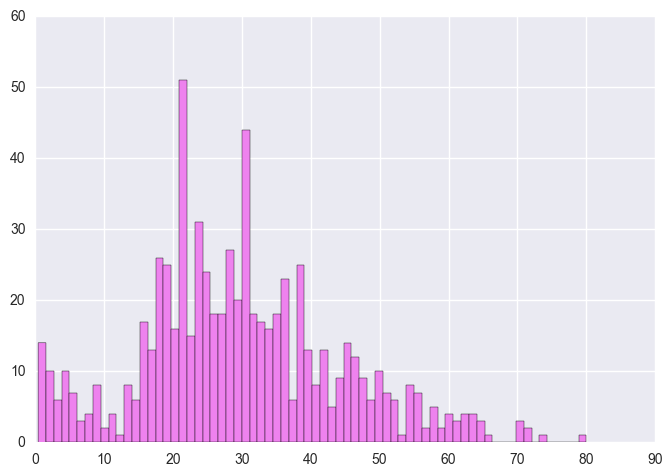

In [106]:
titanic.Age.hist(bins=70, color='violet')
P.show()

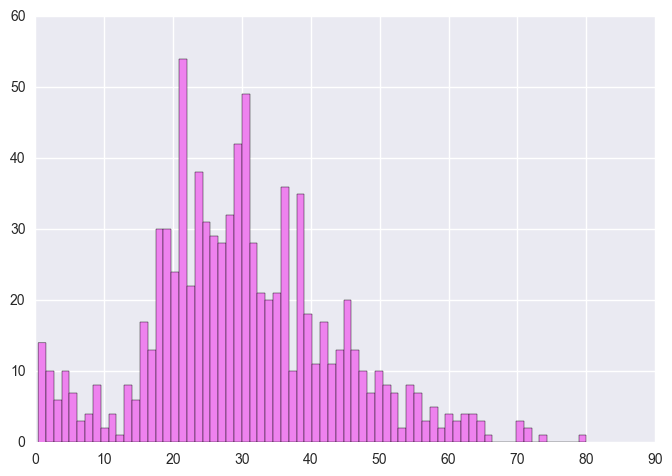

In [107]:
titanic.AgeRF.hist(bins=70, color='violet')
P.show()

In [174]:
titanic_test = fill_missing_age_rf(titanic_test)

In [108]:
### ---- Set up train_data and test_data ----

In [109]:
'''
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck']
for items in cat_vars:
    encoder.fit(titanic[items])
    titanic[items]=encoder.transform(titanic[items])

for items in cat_vars:
    encoder.fit(titanic_test[items])
    titanic_test[items]=encoder.transform(titanic_test[items])

    
titanic.head()
'''

'\nfrom sklearn import preprocessing\nencoder=preprocessing.LabelEncoder()\ncat_vars=[\'Embarked\',\'Sex\',"Title","FsizeD","NlengthD",\'Deck\']\nfor items in cat_vars:\n    encoder.fit(titanic[items])\n    titanic[items]=encoder.transform(titanic[items])\n\nfor items in cat_vars:\n    encoder.fit(titanic_test[items])\n    titanic_test[items]=encoder.transform(titanic_test[items])\n\n    \ntitanic.head()\n'

In [110]:
titanic.dtypes[titanic.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
Deck        object
Title       object
dtype: object

In [263]:
titanic.info()
#titanic.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Deck           204 non-null object
DeckZ          891 non-null int64
NameLength     891 non-null int64
NlengthD       891 non-null float64
Title          891 non-null object
TitleNum       891 non-null float64
Gender         891 non-null int64
Port           891 non-null int64
FamilySize     891 non-null int64
FsizeD         891 non-null int64
AgeMean        891 non-null float64
AgeInterp      891 non-null int64
AgeRF          891 non-null float64
Age*Class      891 non-nul

In [264]:
#titanic_test.info()
titanic_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Deck            True
DeckZ          False
NameLength     False
NlengthD       False
Title          False
TitleNum       False
Gender         False
Port           False
FamilySize     False
FsizeD         False
AgeMean        False
AgeInterp      False
AgeRF          False
Age*Class      False
dtype: bool

In [248]:
#train_data = df[['Survived', 'PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Gender', 'Port', 'AgeFill', 'AgeIsNull', 'FamilySize', 'Age*Class']].values
#train_data= titanic[['Survived', 'PassengerId', 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port', 'SibSp', 'Parch', 'DeckZ']].values
#train_data
#print len(train_data[0])


13


In [239]:
#print len(train_data)

891


In [249]:
#test_data = tdf[['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Gender', 'Port', 'AgeFill', 'AgeIsNull', 'FamilySize', 'Age*Class']].values
#test_data = titanic_test[['PassengerId',  'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port','SibSp', 'Parch', 'DeckZ']].values
#test_data
#print len(test_data[0])

12


In [241]:
#print len(test_data)

418


In [242]:
test_passengerID = titanic_test[['PassengerId']].values

In [323]:
#predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port', 'SibSp', 'Parch', 'DeckZ']
#predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'Port', 'Parch', 'DeckZ']
#predictors = ['TitleNum', 'Pclass', 'NlengthD', 'Gender', 'Age*Class', 'DeckZ', 'Fare']
predictors = [ 'TitleNum', 'NlengthD', 'Gender', 'Fare', 'AgeInterp', 'Age*Class', 'Pclass', 'FsizeD', 'SibSp', 'DeckZ']

In [325]:
features_train = titanic[predictors]
labels_train = titanic["Survived"]
features_test = titanic_test[predictors]

In [ ]:
# 

In [332]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_backup = features_train
features = scaler.fit_transform(features)
pd.DataFrame(features).head()

0         1    2         3       4         5    6    7      8      9
0  0.000000  0.142857  0.5  0.014151  0.2750  0.297297  1.0  0.5  0.125  0.000
1  0.666667  0.571429  0.0  0.139136  0.4750  0.171171  0.0  0.5  0.125  0.375
2  0.333333  0.142857  0.0  0.015469  0.3250  0.351351  1.0  0.0  0.000  0.000
3  0.666667  0.428571  0.0  0.103644  0.4375  0.157658  0.0  0.5  0.125  0.375
4  0.000000  0.142857  0.5  0.015713  0.4375  0.472973  1.0  0.0  0.000  0.000

In [268]:
### ---- Machine Learning Algorithm - SelectKBest -------------

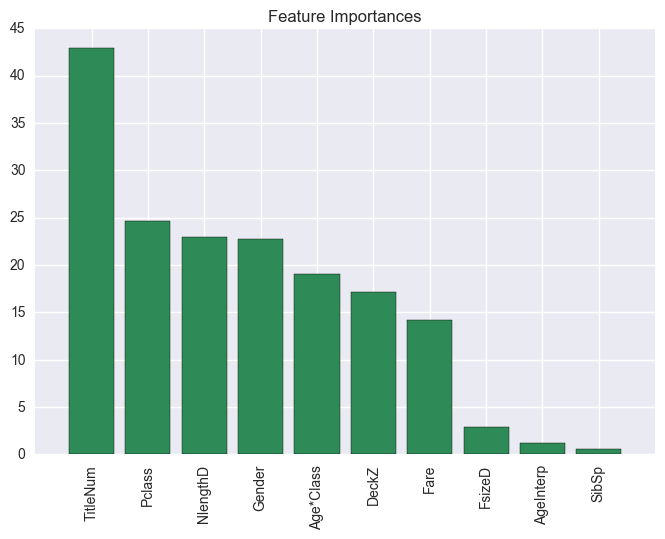

In [333]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(features, labels_train)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()


# Pick only the seven best features.
#predictors = ['TitleNum', 'Pclass', 'NlengthD', 'Gender', 'Age*Class', 'DeckZ', 'Fare']



In [ ]:
# Get the best fitting parameters for RandomForest

In [334]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#features = features_train
labels = labels_train
cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50],
               'min_samples_split' :[2,3,4,5],
               'min_samples_leaf' : [1,2,3]
             }

clf = RandomForestClassifier()
grid_obj = GridSearchCV(clf, parameters, cv=cv)
grid_fit = grid_obj.fit(features, labels)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [243]:
### --- Machine Learning Algorithm - RandomForestClassifier ----

In [337]:
# different set of parameters 

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import KFold

#rf = RandomForestClassifier(random_state=1, n_estimators=66, max_depth=9,min_samples_split=6, min_samples_leaf=4)

# param for -37 score 0.75120
#rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#            max_depth=None, max_features='auto', max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=2,
#            min_samples_split=5, min_weight_fraction_leaf=0.0,
#            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
#            verbose=0, warm_start=False)

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf.fit(features_train, labels_train)

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rf, train_data[0::, 1::], train_data[0::, 0], cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

 
#output = rf.predict(features_test)
output = best_clf.predict(features_test)
print len(output)

prediction_file = open("ml_randomForest39.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()

# score 0.833894500561 (-23), 0.842873176207 (-25), 0.841750841751 (-27), 0.843995510662 (-28)
# actual   0.77512 (-23),       0.76077 (-25),        0.77033 (-27),        0.79426 (-28)       

0.826038159371
418


[ 0.18089852  0.05140613  0.17768226  0.14607131  0.11070312  0.14935376
  0.05475725  0.05281716  0.03178704  0.04452345]
[0 2 5 3 4 6 7 1 9 8]


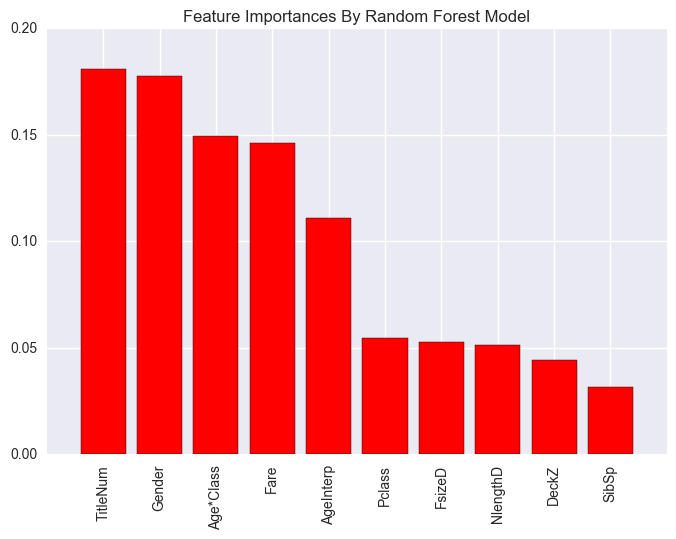

In [331]:

importances = rf.feature_importances_
print importances

std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices

sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

In [ ]:
'''
# original parameters 
forest = RandomForestClassifier(n_estimators = 108, max_features=3, max_depth=None, min_samples_split=2)
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
forest.fit(features_train, labels_train)
scores = cross_validation.cross_val_score(forest, train_data[0::, 1::], train_data[0::, 0], cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

output = forest.predict(features_test)
print len(output)

prediction_file = open("ml_randomForest22.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()
 
# score 0.76077, 0.76555, 0.77033, 0.73206, 
# cross_v: 0.83164983165 (-20), 0.827160493827 (-22)
# actual:    0.76555 (-20),   0.76555 (-20)
'''

In [ ]:
### ---- Machine Learning Algorithm - adaboost ---------

In [246]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf.fit(features_train, labels_train)

output = clf.predict(features_test)
print len(output)

prediction_file = open("ml_adoboost10.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])

for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()

 # score 0.75120, 0,74641, 0.75120

418


In [ ]:
### --- Machine Learning Algorithm - GaussianNB ----

In [247]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)

output = clf.predict(features_test)
print len(output)

prediction_file = open("ml_gaussianNB6.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])
for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()
 
# score 0.73684, 0.73206, 

418


In [ ]:
### ---- Machine Learning Algorithm - K nearest neighbour

In [ ]:
''''
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 35
clf = KNeighborsClassifier(n_neighbors)
clf.fit(features_train, labels_train)
output = clf.predict(features_test)
print len(output)

prediction_file = open("ml_knn2.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])

for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close

# score 0.6411
# no result?
'''

In [ ]:
### ---- Machine Learning Algorithm - DecisionTree

In [ ]:
''''
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(features_train, labels_train)
output = clf.predict(features_test)
print len(output)

prediction_file = open("ml_decisiontree2.csv", "wb")
prediction_file_object = csv.writer(prediction_file)
prediction_file_object.writerow(["PassengerId", "Survived"])

for i in range(0, len(output)):
    prediction_file_object.writerow( [ int(test_passengerID[i]), int(output[i]) ] )
prediction_file.close()

 # score 0.59809
 '''